<a href="https://colab.research.google.com/github/fitrinaulia/fitrinaulia.github.io/blob/main/Spaceship_Titanic_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spaceship-Titanic Transported Prediction
Spaceship-Titanic dataset is obtained from https://www.kaggle.com/c/spaceship-titanic. It has goal to predict which passengers were transported to an alternate dimention after the ship collided with a spacetime anomaly hidden within a dust cloud. Pretty much likely the Titanic ship whick sinked after hitting an iceberg, but this one is an outer-space version.

---
The dataset contains two files: **train.csv** is used to train the model and **test.csv** is the data test which we will predict.

---
In this project I do some data exploration and analysis, data pre-processing, and prediction using Random Forest Classifier.





## Data Load and Exploration
First, we will explore what's inside this data. The data contains information:
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.



In [135]:
#import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

First, let's look what is inside train.csv

In [136]:
#EXPLORING TRAIN DATA
df_train = pd.read_csv('train.csv')
#data exploration
print('\n first 5 rows: ')
print(df_train.head())
print('\n data info: ')
print(df_train.info())
print('\n statistical information: ')
print(df_train.describe().T)
print('\n data shape: ')
print(df_train.shape)
print('\n train data distribution: ')
print(df_train.groupby(['Transported']).size())



 first 5 rows: 
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4 

This train.csv contains two third (8693) of the passengers to be used as training data. We can see more than half passengers are transported to other dimention.

Now, let's see the second file, test.csv

In [137]:
#EXPLORING TEST DATA
df_test = pd.read_csv('test.csv')
#data exploration
print('\n first 5 rows: ')
print(df_test.head())
print('\n data info: ')
print(df_test.info())
print('\n statistical information: ')
print(df_test.describe().T)
print('\n data shape: ')
print(df_test.shape)


 first 5 rows: 
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez  

 data info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns

This file contains 4277 data, the rest of passengers, to be used as testing data. That's why there's no 'Transported' column in this data.

## EDA
We want to see if there's any reason or features causing passengers to be transported. We will see the distribution of some categorical features below.

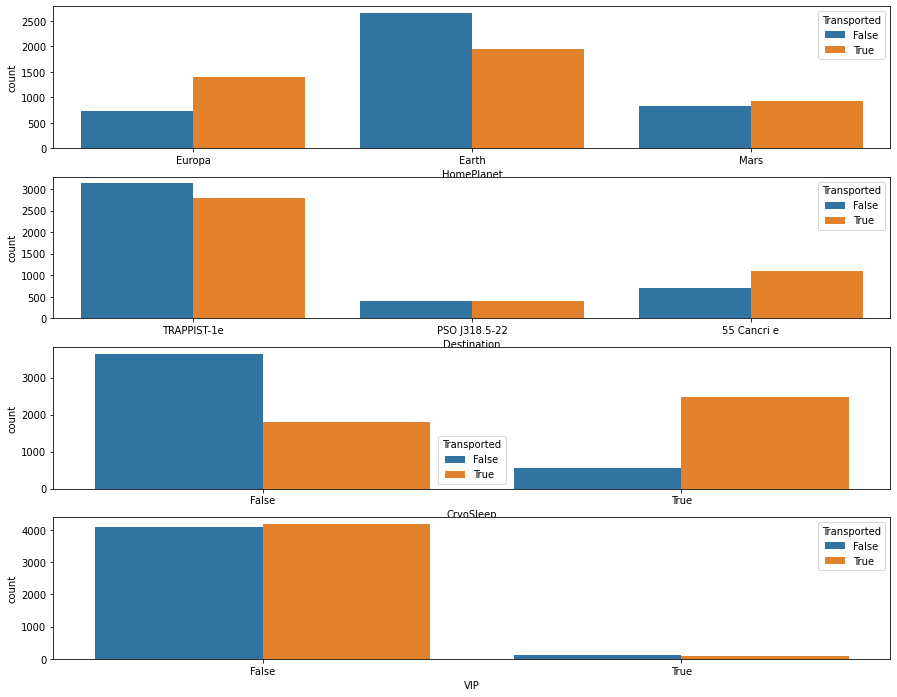

In [138]:
#Distribution of Categorical Features
column = ['HomePlanet', 'Destination', 'CryoSleep', 'VIP']
fig = plt.figure(figsize=(15,12))
for i, name in enumerate(column):
  ax = fig.add_subplot(4, 1, i+1)
  sns.countplot(x=name, data=df_train, axes=ax, hue='Transported')

As we can see, there is no pretty much contidion causing why a passenger is transported. But there is maybe causality in 'Cryosleep' feature. Passengers who are in cryosleep is likely to be transported than passengers who aren't.

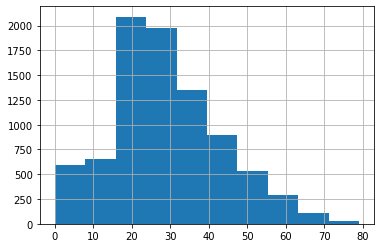

In [139]:
#Age
df_train['Age'].hist()

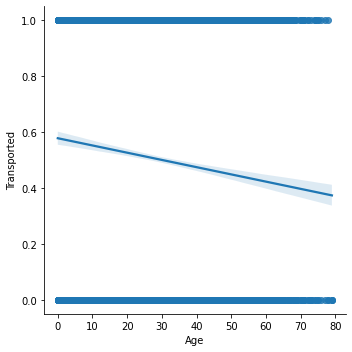

In [140]:
sns.lmplot(x='Age', y='Transported', data=df_train)

In 'Age' feature, old passengers are less likely to be transported.

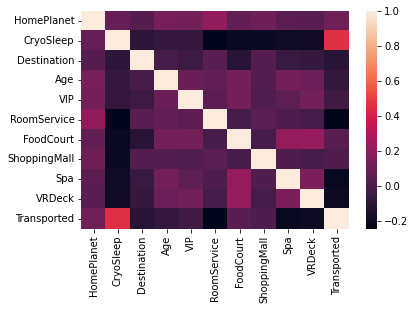

In [157]:
sns.heatmap(df_train.corr())

Hmm, yes. It's difficult to find correlation between the features in this dataset.

## Data Preprocessing
Before we train our model, we need to do data pre-processing. In this dataset we will handling missing values and labeling data.

Let us check how much missing values we need to handle in both files.

In [141]:
#Missing values in train.csv
print('missing values: ')
print(df_train.isnull().sum())

missing values: 
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


In [142]:
#Missing values in test.csv
print('missing values: ')
print(df_test.isnull().sum())

missing values: 
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


### Inputing Missing Values

In [143]:
#Categorial features
data = [df_train, df_test]
catg = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for df in data:
  for i in catg:
    df[i] = df[i].fillna(df[i].mode()[0])

In [144]:
#Numerical Features
rs = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for df in data:
  for i in rs:
    x = df[i].median()
    df[i].fillna(x, inplace=True)

We can drop some columns like Name and Cabin

In [145]:
#Drop column for model
non = ['Name', 'Cabin']
for df in data:
  for i in non:
    df.drop(i, axis = 1, inplace=True)

Last check

In [146]:
df_train.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

In [147]:
df_test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

### Encoding Categorial Features

In [148]:
#Label encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

cod = ['HomePlanet', 'Destination']
for df in data:
  for i in cod:
    df[i] = LE.fit_transform(df[i])

df_train.head()    

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,1,False,2,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,0,False,2,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,1,False,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0003_02,1,False,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,0004_01,0,False,2,16.0,False,303.0,70.0,151.0,565.0,2.0,True


## Model
In this part, we will try to see which model is suited best between Random Forest, Logistic Regression, and Decission Tree.

Make testing function:

In [149]:
#Start Testing the Models
from sklearn.model_selection import train_test_split

X = df_train.drop('Transported', axis=1)
y = df_train['Transported']

In [150]:
def testing_model(model, X, y):
  #splitting the data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
  model.fit(X_train, y_train)
  print('Testing Accuracy :', model.score(X_test, y_test))

Testing the models:

In [151]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
testing_model(RF, X, y)

Testing Accuracy : 0.7688326624496837


In [152]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression()
testing_model(LogR, X, y)

Testing Accuracy : 0.7671075330649799


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [153]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
testing_model(DT, X, y)

Testing Accuracy : 0.7107533064979874


### Prediction Result Using Chosen Model
The chosen model is Random Forest with ~76.8% accurracy.

In [154]:
#Using the RF model

model = RF.fit(X, y)
prediction = RF.predict(df_test)

In [155]:
#assign new column in test data
df_test['Transported'] = prediction

#prediction amount of transported passengers
trsp = df_test[df_test.Transported == True]

print('% Transported passenger: ')
print(len(trsp)/len(df_test['Transported']))

% Transported passenger: 
0.48258124853869533


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


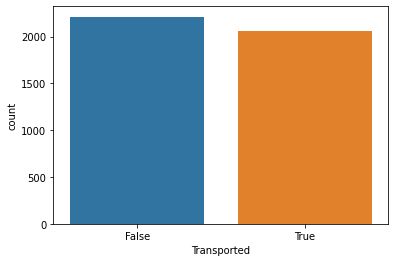

In [156]:
sns.countplot('Transported', data=df_test)

## Summary
There is no apparent reason from the dataset of why passengers are transported into other dimention except the 'CryoSleep' feature. This cause is debatable and is an open discussion. Here I use Random Forest model to predict the transported passengers from test.csv. I got ~48.2% passengers from testing dataset will be transported within ~76.8% accuracy. I only tested 3 models in this project and maybe there are more models with better accuracy to be used in this project.

Thank you!